# Desafio Coding Dojo
Analizando los Salarios en Ciencia de Datos en 2023

In [50]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ds_salaries.csv')
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [25]:
# Encuentra filas duplicadas (considerando todas las columnas)
duplicates = data[data.duplicated()]

# Muestra las filas duplicadas
print(duplicates)

# Cuenta el número de filas duplicadas
num_duplicates = duplicates.shape[0]
print(f"Número de filas duplicadas: {num_duplicates}")


      work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     salary_currency  salary_in_usd emp

In [29]:
# Imprime los tipos de datos de cada columna
print(data.dtypes)
# el salario y company_size debemos cambiar su tipo a Int y Str para mejor manejo

data['salary'] = data['salary'].astype(int)
data['company_size'] = data['company_size'].astype(str)
print(data.dtypes)


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [30]:
unique_values = data['employment_type'].unique()
print(unique_values)

#No se encontraron inconsistencias

['FT' 'CT' 'FL' 'PT']


In [31]:
# Valores faltantes en cada columna
missing_values = data.isnull().sum()
print(missing_values)

# Mostrar las filas con valores faltantes
rows_with_missing = data[data.isnull().any(axis=1)]
print(rows_with_missing)

#No existen valores faltantes. Todo ok por ahora.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [32]:
# Detección de datos anómalos: Identifica y corrige cualquier punto de dato
#inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares
#para un puesto de entrada).

#Procedo a eliminar los duplicados que son 1171 filas.  Non se procede por ser un numero muy grande

#data.drop_duplicates(keep='first', inplace=True)

filtered_data = data[(data['salary'] < 100) | (data['salary'] > 500000)]
print(filtered_data)

#fuente https://www.google.com/search?q=salario+de+data+sciencies+en+USA&rlz=1C1VDKB_enPY1107PY1107&oq=salario+de+data+sciencies+en+USA&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIJCAEQIRgKGKABMgkIAhAhGAoYoAEyCQgDECEYChigATIJCAQQIRgKGKAB0gEINzQ4MGowajmoAgCwAgE&sourceid=chrome&ie=UTF-8
# El rango de salario anual de un DataSciences en EE.UU. es de 105.000 U$S al año.
# Mas abajo se puede ver que un DATA Science Manager gana mas de 400.000 U$S se excluye del DataSet por ahora









      work_year experience_level employment_type                  job_title  \
41         2022               MI              FT  Machine Learning Engineer   
80         2023               MI              FT             Data Scientist   
156        2023               MI              FT     Applied Data Scientist   
217        2023               EN              FT              Data Engineer   
528        2023               SE              FT               AI Scientist   
...         ...              ...             ...                        ...   
3678       2021               MI              FT             Data Scientist   
3682       2020               EN              FT              Data Engineer   
3729       2021               EN              FT               AI Scientist   
3734       2021               MI              FT          Lead Data Analyst   
3754       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employ

In [36]:
index = data[data['salary'] ==  423834].index[0]
print(index)


528


In [37]:
data = data.drop(index=528)

# Restablecer el índice después de eliminar la fila
data = data.reset_index(drop=True)

# Verificar la forma del DataFrame después de eliminar el registro
print(data.shape)

(3754, 11)


In [38]:
filtered_data = data[(data['salary'] < 100) | (data['salary'] > 500000)]
print(filtered_data)


      work_year experience_level employment_type                  job_title  \
41         2022               MI              FT  Machine Learning Engineer   
80         2023               MI              FT             Data Scientist   
156        2023               MI              FT     Applied Data Scientist   
217        2023               EN              FT              Data Engineer   
734        2023               MI              FT             Data Scientist   
...         ...              ...             ...                        ...   
3677       2021               MI              FT             Data Scientist   
3681       2020               EN              FT              Data Engineer   
3728       2021               EN              FT               AI Scientist   
3733       2021               MI              FT          Lead Data Analyst   
3753       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employ

2.	Exploración de datos con Python:
o	Visualizaciones exploratorias univariadas:
Crea dos tipos diferentes de visualizaciones univariadas.
Cada visualización debe incluir una breve interpretación dentro del archivo de código.


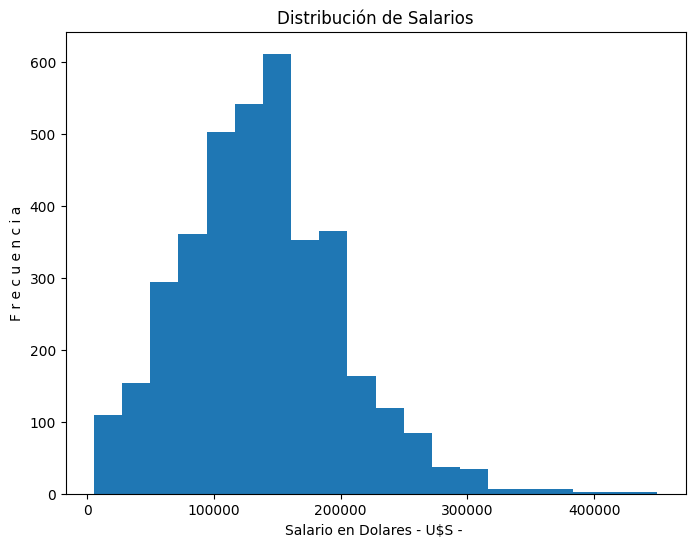

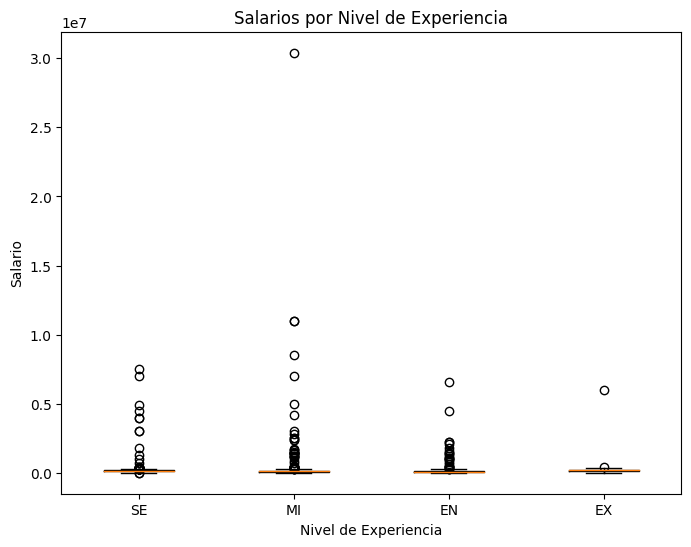

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Histograma para la columna 'salary_in_USD'  DEBIDO AQUE LOS SALARIOS
# estan expresados en muchas monedas.
plt.figure(figsize=(8, 6))
plt.hist(data['salary_in_usd'], bins=20)
plt.title('Distribución de Salarios')
plt.xlabel('Salario en Dolares - U$S - ')
plt.ylabel('F r e c u e n c i a')
plt.show()
# Interpretación: Este histograma muestra la distribución de los salarios en el dataset.
# Podemos observar la frecuencia de cada rango de salario y si la distribución es simétrica,
# sesgada o tiene valores atípicos.

# Box plot para la columna 'salary_in_usd' por 'experience_level'
salary_by_experience = [data['salary'][data['experience_level'] == level] for level in data['experience_level'].unique()]
plt.figure(figsize=(8, 6))
plt.boxplot(salary_by_experience, labels=data['experience_level'].unique())
plt.title('Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario')
plt.show()
# Interpretación: Este box plot compara la distribución de los salarios para diferentes niveles de experiencia.
# Podemos observar la mediana, los cuartiles y los valores atípicos para cada grupo.
# Esto nos ayuda a entender cómo varían los salarios en Dolares Americanos según la experiencia.
# Los Salarios de mayor expereincias estan concentrados entre 140 a 180 mil dolares.

exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

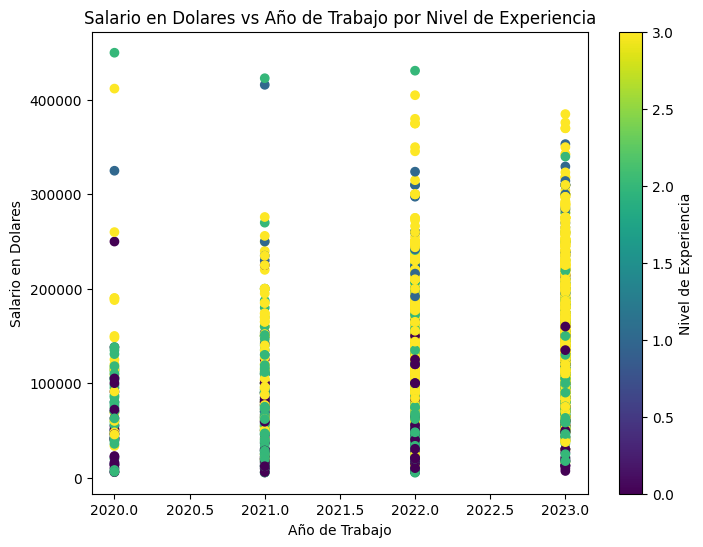

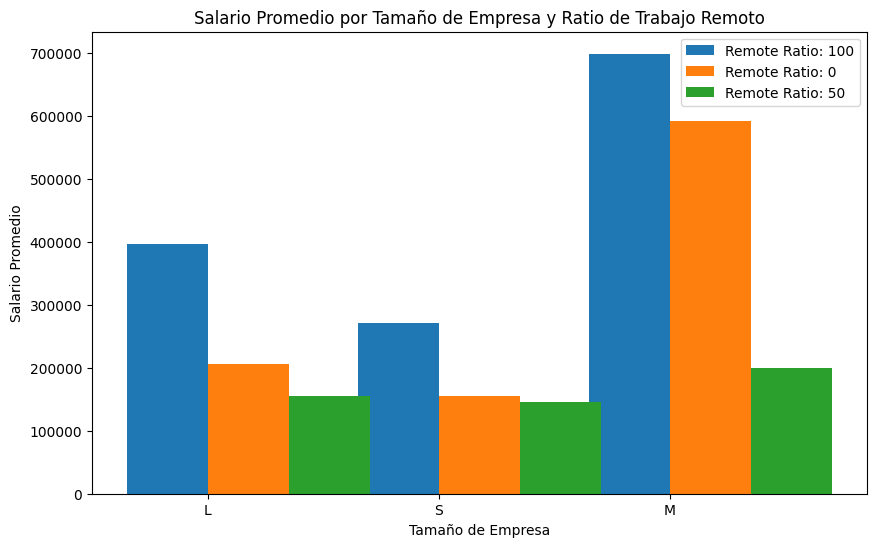

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot para 'salary' vs 'work_year' con codificación de color por 'experience_level'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['work_year'], data['salary_in_usd'], c=data['experience_level'].astype('category').cat.codes, cmap='viridis')
plt.title('Salario en Dolares vs Año de Trabajo por Nivel de Experiencia')
plt.xlabel('Año de Trabajo')
plt.ylabel('Salario en Dolares')
plt.colorbar(scatter, label='Nivel de Experiencia')
plt.show()
# Interpretación: Este scatter plot muestra la relación entre el salario y el año de trabajo,
# con puntos codificados por color según el nivel de experiencia.
# Podemos observar si hay una tendencia entre el salario y el año de trabajo,
# y cómo el nivel de experiencia afecta esta relación.

# Barras agrupadas para 'company_size' vs 'salary' por 'remote_ratio'
company_sizes = data['company_size'].unique()
remote_ratios = data['remote_ratio'].unique()
salary_means = []
for size in company_sizes:
    for ratio in remote_ratios:
        salary_means.append(data[(data['company_size'] == size) & (data['remote_ratio'] == ratio)]['salary'].mean())

bar_width = 0.35
index = np.arange(len(company_sizes))
plt.figure(figsize=(10, 6))
for i, ratio in enumerate(remote_ratios):
    plt.bar(index + i * bar_width, [salary_means[j + i * len(company_sizes)] for j in range(len(company_sizes))],
            bar_width, label=f'Remote Ratio: {ratio}')

plt.title('Salario Promedio por Tamaño de Empresa y Ratio de Trabajo Remoto')
plt.xlabel('Tamaño de Empresa')
plt.ylabel('Salario Promedio')
plt.xticks(index + bar_width / 2, company_sizes)
plt.legend()
plt.show()

# Interpretación:
# Este gráfico de barras agrupadas compara el salario promedio
# para diferentes tamaños de empresa y ratios de trabajo remoto.
# Podemos observar cómo el tamaño de la empresa y el trabajo remoto afectan el salario promedio.

3.	Análisis adicional:
- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.




In [46]:
statistics = data.describe()

# Imprimir las estadísticas
print(statistics)


         work_year        salary  salary_in_usd  remote_ratio
count  3754.000000  3.754000e+03    3754.000000   3754.000000
mean   2022.373468  1.903468e+05  137494.134257     46.283964
std       0.691465  6.714258e+05   62890.622978     48.589652
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.377500e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [49]:
mean_salary = statistics['salary']['mean']
std_salary = statistics['salary']['std']
print(f"Media del salario: {mean_salary}")
print(f"Desviación estándar del salario: {std_salary}")

mean_salary = statistics['salary_in_usd']['mean']
std_salary = statistics['salary_in_usd']['std']
print(f"Media del salario en dolares: {mean_salary}")
print(f"Desviación estándar del salario en dolares: {std_salary}")


Media del salario: 190346.7959509856
Desviación estándar del salario: 671425.8220923927
Media del salario en dolares: 137494.13425679275
Desviación estándar del salario en dolares: 62890.62297790079


Podemos ver la media de los Salarios en Moneda local y en Dolares para un mejor entendimiento y toma de decisiones.


- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

Para identificar tendencias en nuestro DATASET de Salario.
Podemos combinar las visualizaciones y estadísticas descriptivas que hemos generado. Para analizar y discutir algunas tendencias notables, basándome en las visualizaciones y estadísticas que ya hemos creado:

Tendencias:

Relación entre salario y año de trabajo: En el scatter plot de "Salario en Dolares Americanos vs Año de Trabajo por Nivel de Experiencia", se puede observar una tendencia general al alza, lo que sugiere que los salarios tienden a aumentar con los años de experiencia. Sin embargo, esta tendencia no es lineal y parece haber más variación en los salarios para los años de trabajo más recientes.

Influencia del nivel de experiencia en el salario: Tanto en el box como en la barra, se aprecia claramente que el nivel de experiencia tiene un impacto significativo en el salario. Los niveles de experiencia más altos (SE, MI) tienden a tener salarios más altos en comparación con los niveles de entrada (EN, EX).
Efecto del tamaño de la empresa en el salario: En el gráfico de barras agrupadas, se puede observar que las empresas de mayor tamaño (L) tienden a ofrecer salarios más altos en promedio en comparación con las empresas más pequeñas (S, M).

Impacto del trabajo remoto en el salario: El gráfico de barras agrupadas también sugiere que el ratio de trabajo remoto puede influir en el salario. En algunos casos, los salarios parecen ser más altos para ratios de trabajo remoto más altos, pero esta tendencia no es consistente en todos los tamaños de empresa.

Discusión:

Estas tendencias observadas son consistentes con la intuición general en el mercado laboral: la experiencia, el tamaño de la empresa y la flexibilidad laboral (trabajo remoto) suelen estar relacionados con salarios más altos. Sin embargo, es importante recordar que estas son solo tendencias generales y que puede haber variaciones significativas dentro de cada grupo.


Gracias Profesor por su lectura.

Raul De Los Santos Caceres Penayo
